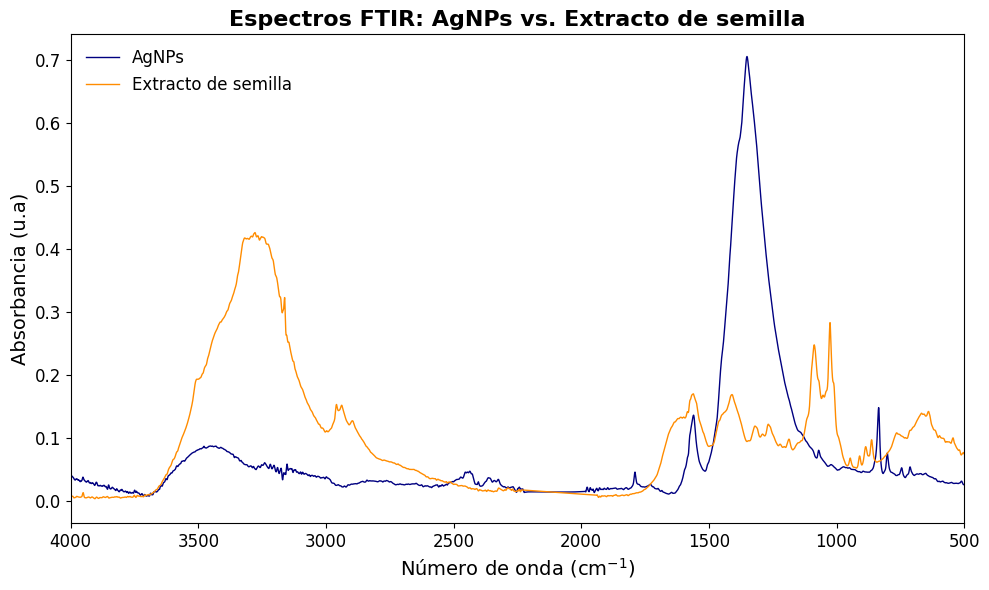

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Ruta al archivo Excel
ruta_excel = '../files/input/FTIR.xlsx'

# Cargar el archivo Excel desde la segunda fila como encabezado
df = pd.read_excel(ruta_excel, header=1)

# Asignar columnas a variables
wn_ag = df['Número de onda (cm-1)']          # Número de onda (cm⁻¹) para AgNPs
abs_ag = df['Absorbancia (u.a)']             # Absorbancia (u.a) para AgNPs
wn_seed = df['Número de onda (cm-1).1']      # Número de onda (cm⁻¹) para Semilla
abs_seed = df['Absorbancia (u.a).1']         # Absorbancia (u.a) para Semilla

# Crear la figura
plt.figure(figsize=(10, 6))

# Graficar los espectros con líneas más delgadas
plt.plot(wn_ag, abs_ag, label='AgNPs', color='navy', linewidth=1)
plt.plot(wn_seed, abs_seed, label='Extracto de semilla', color='darkorange', linewidth=1)

# Ajustar ejes y etiquetas
plt.gca().invert_xaxis()  # Invertir el eje X para estilo FTIR
plt.xlim(4000, 500)  # Ajustar rango del eje X
plt.xlabel('Número de onda (cm$^{-1}$)', fontsize=14)
plt.ylabel('Absorbancia (u.a)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Eliminar márgenes para el eje X
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Añadir título y leyenda mejorada
plt.title('Espectros FTIR: AgNPs vs. Extracto de semilla', fontsize=16, weight='bold')
plt.legend(loc='upper left', fontsize=12, frameon=False)

# Ajustar diseño general
plt.tight_layout()

# Crear la carpeta si no existe
output_dir = '../files/plots/'
os.makedirs(output_dir, exist_ok=True)

# Guardar el gráfico en la ubicación especificada
plt.savefig(os.path.join(output_dir, 'spectrum.png'), dpi=300)

# Mostrar el gráfico
plt.show()

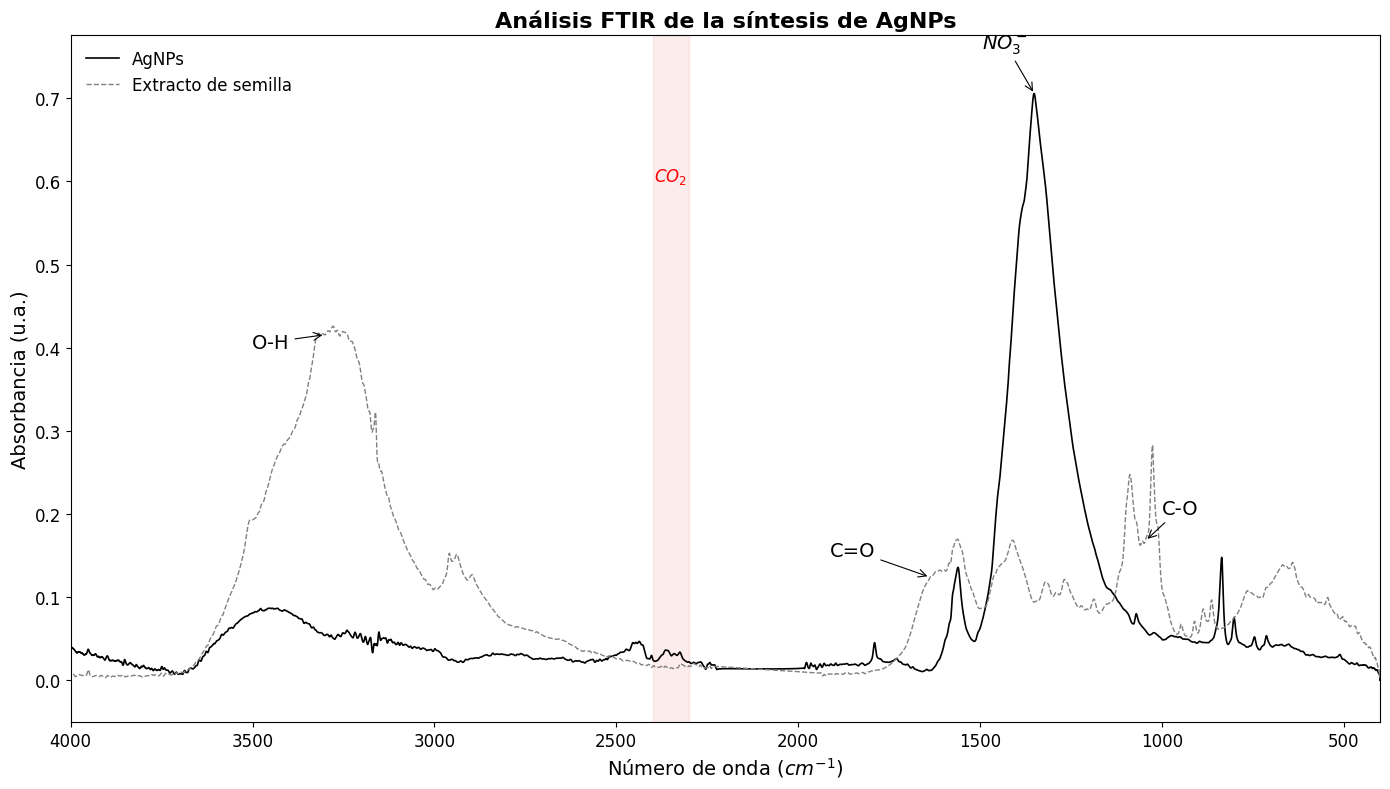

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# --- Carga de Datos ---
# Asegúrate de que la ruta al archivo Excel sea correcta.
try:
    ruta_excel = '../files/input/FTIR.xlsx'
    df = pd.read_excel(ruta_excel, header=1)
    
    # Asignar columnas y limpiar datos
    wn_ag = pd.to_numeric(df['Número de onda (cm-1)'], errors='coerce')
    abs_ag = pd.to_numeric(df['Absorbancia (u.a)'], errors='coerce')
    wn_seed = pd.to_numeric(df['Número de onda (cm-1).1'], errors='coerce')
    abs_seed = pd.to_numeric(df['Absorbancia (u.a).1'], errors='coerce')

    ag_data = pd.DataFrame({'wn': wn_ag, 'abs': abs_ag}).dropna().sort_values(by='wn')
    seed_data = pd.DataFrame({'wn': wn_seed, 'abs': abs_seed}).dropna().sort_values(by='wn')

except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta '{ruta_excel}'.")
    print("Generando datos de ejemplo para la demostración.")
    # Datos de ejemplo si el archivo no existe
    wn_base = np.linspace(400, 4000, 2000)
    abs_seed_sim = (np.exp(-((wn_base - 3300) / 180)**2) * 0.42 + 
                    np.exp(-((wn_base - 2920) / 50)**2) * 0.15 +
                    np.exp(-((wn_base - 1637) / 40)**2) * 0.18 + 
                    np.exp(-((wn_base - 1045) / 60)**2) * 0.22 +
                    np.random.normal(0, 0.005, len(wn_base)))
    seed_data = pd.DataFrame({'wn': wn_base, 'abs': abs_seed_sim})
    abs_ag_sim = (abs_seed_sim * 0.25 + 
                  np.exp(-((wn_base - 1385) / 10)**2) * 0.72 +
                  np.random.normal(0, 0.005, len(wn_base)))
    ag_data = pd.DataFrame({'wn': wn_base, 'abs': abs_ag_sim})
    ag_data.loc[ag_data['abs'] < 0, 'abs'] = 0.01
    seed_data.loc[seed_data['abs'] < 0, 'abs'] = 0.01
    
    co2_mask = (wn_base > 2340) & (wn_base < 2380)
    ag_data.loc[co2_mask, 'abs'] += np.random.normal(0.05, 0.02, np.sum(co2_mask))
    seed_data.loc[co2_mask, 'abs'] += np.random.normal(0.05, 0.02, np.sum(co2_mask))


# --- Creación del Gráfico ---
fig, ax = plt.subplots(figsize=(14, 8))

# Graficar los espectros
ax.plot(ag_data['wn'], ag_data['abs'], label='AgNPs', color='black', linewidth=1.2, linestyle='-')
ax.plot(seed_data['wn'], seed_data['abs'], label='Extracto de semilla', color='gray', linewidth=1.0, linestyle='--')

# --- Ajustes de Ejes y Etiquetas ---
ax.invert_xaxis()
ax.set_xlim(4000, 400)
ax.set_ylim(-0.05, max(ag_data['abs'].max(), seed_data['abs'].max()) * 1.1)
ax.set_xlabel('Número de onda ($cm^{-1}$)', fontsize=14)
ax.set_ylabel('Absorbancia (u.a.)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

# --- Título y Leyenda ---
ax.set_title('Análisis FTIR de la síntesis de AgNPs', fontsize=16, weight='bold')
ax.legend(loc='upper left', fontsize=12, frameon=False)

# --- ANOTACIONES DE ESTILO PROFESIONAL (CON FLECHAS CORTAS) ---

# Lista de anotaciones: [texto, wavenumber, serie_datos, pos_texto_x, pos_texto_y]
# SE HAN AJUSTADO LAS POSICIONES DEL TEXTO (txt_x, txt_y) PARA ACORTAR LAS FLECHAS
annotations = [
    ['O-H', 3300, seed_data, 3450, 0.4],      # Texto más cerca del pico
    ['C=O', 1637, seed_data, 1850, 0.15],     # Texto más cerca del pico
    ['C-O', 1045, seed_data, 950, 0.2],      # Texto más cerca del pico
    ['$NO_3^-$', 1350, ag_data, 1430, 0.76]    # Texto más cerca del pico
]

for label, wn_target, data, txt_x, txt_y in annotations:
    # Encontrar la absorbancia exacta en la curva usando interpolación
    abs_target = np.interp(wn_target, data['wn'], data['abs'])
    
    # Añadir la anotación con una flecha recta y fina
    ax.annotate(label,
                xy=(wn_target, abs_target),      # Punto exacto al que apunta la flecha
                xytext=(txt_x, txt_y),           # Posición del texto (ajustada para ser más cercana)
                fontsize=14,
                ha='center',
                arrowprops=dict(
                    arrowstyle="->",             # Flecha estándar
                    color='black',
                    linewidth=0.8,               # Línea delgada
                    shrinkB=2,                   # Acortar la flecha para que la punta toque la línea
                    connectionstyle="arc3,rad=0" # rad=0 asegura una línea recta
                ))

# --- Resaltar la Zona de CO₂ atmosférico ---
ax.axvspan(2300, 2400, color='lightcoral', alpha=0.15)
ax.text(2350, 0.6, '$CO_2$', fontsize=12, ha='center', color='red', weight='bold')


# --- Ajustes Finales y Guardado ---
plt.tight_layout()

output_dir = '../files/plots/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Guardar el gráfico en alta resolución
plt.savefig(os.path.join(output_dir, 'FTIR_espectro_final_optimizado.png'), dpi=300)

plt.show()

In [1]:
print("Acabado")

Acabado
